In [121]:
%matplotlib inline
#%matplotlib widget

In [122]:
#############imports######################################################################
import cv2 as cv2
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import trackpy as tp
from ipywidgets import HBox, Textarea, interact

In [123]:
def timeToSec(timeStr):#Transform m:s format into total number of seconds
    timeArr = timeStr.split(':')
    timeMin = int(timeArr[0])
    timeSec = int(timeArr[1])
    totSec = timeMin*60+timeSec
    return totSec

In [124]:
expSumFileName ='C:\\Users\\User\\Documents\\Eden\\locate_git_code\\dress_exp\\dress_exp.csv'
expSum = pd.read_csv(expSumFileName,index_col=0)
fps=25
indexes=np.r_[3:63, 73:202].tolist()
#indexes=np.r_[182].tolist()
expSum=expSum.iloc[indexes]
print(indexes)

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201]


In [125]:
data = {'filename':[],'robots_skirts[cm]':[],'frames_No':[],'kissing_time':[],'bottype':[]}
columns = ['filename','robots_skirts[cm]','frames_No','kissing_time','bottype']
data_table = pd.DataFrame(data=data,columns=columns)
for index,row in (expSum.iterrows()):
    locating_file=row.LocatingFile
    print(locating_file)
    dress_diameter=row.dress_diameter_bot_1
    bottype=row.bottype
    startMin =row.start_min
    endMin =row.end_min
    start_point=timeToSec(startMin)*25#6000
    end_point=timeToSec(endMin)*25#8000#frameCount
    df=pd.read_csv(locating_file,index_col=0)
    #df=df[((df.frame<end_point)&(df.frame>=start_point))]
    count=0
    for frame in range(start_point,end_point):
        relevant_data=df[(df.frame==frame)]
        if len(relevant_data)<2:
            continue
        x_sqrt=(relevant_data.x.iloc[0]-relevant_data.x.iloc[1])**2
        y_sqrt=(relevant_data.y.iloc[0]-relevant_data.y.iloc[1])**2
        cond=(relevant_data.r.iloc[0]+relevant_data.r.iloc[1]+5)**2
        if x_sqrt+y_sqrt<cond:
            count=count+1
    kissing_time=count/fps
    line_data={'filename':[locating_file],'robots_skirts[cm]':[dress_diameter],'frames_No':[count],'kissing_time':[kissing_time]
              ,'bottype':[bottype]}
    data_line= pd.DataFrame(data=line_data,columns=columns)
    data_table = pd.concat([data_table,data_line],ignore_index=True)
print(data_table)
data_table.to_csv('C:\\Users\\User\\Documents\\Eden\\locate_git_code\\dress_exp\\data.csv')

D:\Eden\dress_exp\7_5_24\C0770.MP4_locatedFull20240508_bot_Eden_test.csv
D:\Eden\dress_exp\7_5_24\C0770.MP4_locatedFull20240508_bot_Eden_test.csv
D:\Eden\dress_exp\7_5_24\C0770.MP4_locatedFull20240508_bot_Eden_test.csv
D:\Eden\dress_exp\7_5_24\C0770.MP4_locatedFull20240508_bot_Eden_test.csv
D:\Eden\dress_exp\7_5_24\C0770.MP4_locatedFull20240508_bot_Eden_test.csv
D:\Eden\dress_exp\7_5_24\C0770.MP4_locatedFull20240508_bot_Eden_test.csv
D:\Eden\dress_exp\7_5_24\C0770.MP4_locatedFull20240508_bot_Eden_test.csv
D:\Eden\dress_exp\7_5_24\C0770.MP4_locatedFull20240508_bot_Eden_test.csv
D:\Eden\dress_exp\7_5_24\C0770.MP4_locatedFull20240508_bot_Eden_test.csv
D:\Eden\dress_exp\7_5_24\C0770.MP4_locatedFull20240508_bot_Eden_test.csv
D:\Eden\dress_exp\7_5_24\C0770.MP4_locatedFull20240508_bot_Eden_test.csv
D:\Eden\dress_exp\7_5_24\C0770.MP4_locatedFull20240508_bot_Eden_test.csv
D:\Eden\dress_exp\7_5_24\C0770.MP4_locatedFull20240508_bot_Eden_test.csv
D:\Eden\dress_exp\7_5_24\C0770.MP4_locatedFull20240

                     frames_No  kissing_time
robots_skirts[cm]                           
6.46                 32.000000      1.280000
9.78                 50.888889      2.035556
11.44               108.714286      4.348571
13.10               432.363636     17.294545
19.60              9333.705882    373.348235
23.00              9084.133333    363.365333


C:\Users\User\AppData\Local\Temp\ipykernel_81012\1937634581.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_mean=data_table.groupby(['bottype','robots_skirts[cm]']).mean()
C:\Users\User\AppData\Local\Temp\ipykernel_81012\1937634581.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_std=data_table.groupby(['bottype','robots_skirts[cm]']).std()


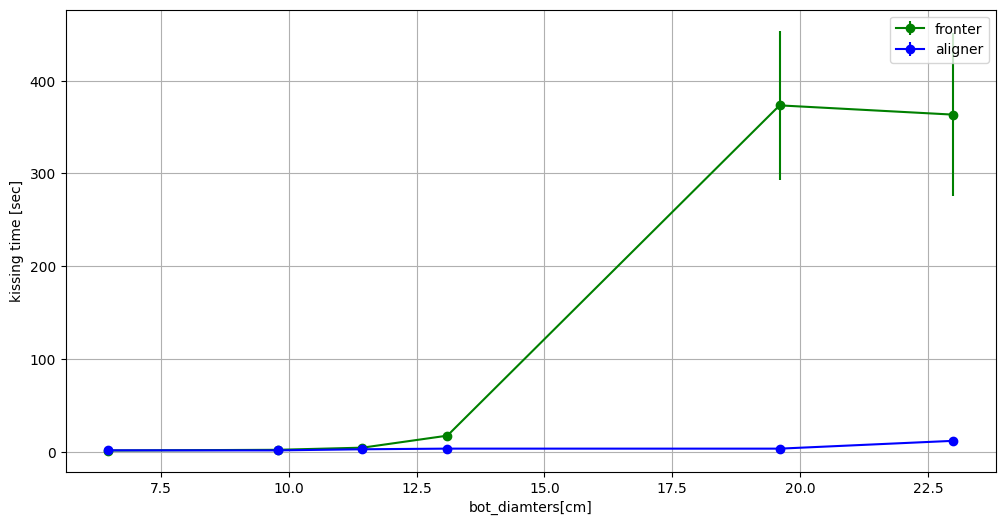

In [126]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
data_mean=data_table.groupby(['bottype','robots_skirts[cm]']).mean()
print(data_mean.loc['fronter'])
data_std=data_table.groupby(['bottype','robots_skirts[cm]']).std()
data_count=data_table.groupby(['bottype','robots_skirts[cm]']).count()
test_front=data_std.loc['fronter']['kissing_time']/np.sqrt(data_count.loc['fronter']['kissing_time'])
test_align=data_std.loc['aligner']['kissing_time']/np.sqrt(data_count.loc['aligner']['kissing_time'])
ax.errorbar(data_mean.loc['fronter'].index,data_mean.loc['fronter']['kissing_time'],yerr=test_front
            ,linestyle='-',marker='o',color='g',label='fronter')
ax.errorbar(data_mean.loc['aligner'].index,data_mean.loc['aligner']['kissing_time'],yerr=test_align
            ,linestyle='-',marker='o',color='b',label='aligner')
ax.set_xlabel('bot_diamters[cm]')
ax.set_ylabel('kissing time [sec]')
ax.grid()
ax.legend()
data_mean.to_csv('C:\\Users\\User\\Documents\\Eden\\locate_git_code\\dress_exp\\mean_data.csv')
data_std.to_csv('C:\\Users\\User\\Documents\\Eden\\locate_git_code\\dress_exp\\std_data.csv')
data_count.to_csv('C:\\Users\\User\\Documents\\Eden\\locate_git_code\\dress_exp\\count_data.csv')

                     frames_No  kissing_time
robots_skirts[cm]                           
6.46                 32.000000      1.280000
9.78                 50.888889      2.035556
11.44               108.714286      4.348571
13.10               432.363636     17.294545
19.60              9333.705882    373.348235
23.00              9084.133333    363.365333


C:\Users\User\AppData\Local\Temp\ipykernel_81012\2406971242.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_mean=data_table.groupby(['bottype','robots_skirts[cm]']).mean()
C:\Users\User\AppData\Local\Temp\ipykernel_81012\2406971242.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_std=data_table.groupby(['bottype','robots_skirts[cm]']).std()


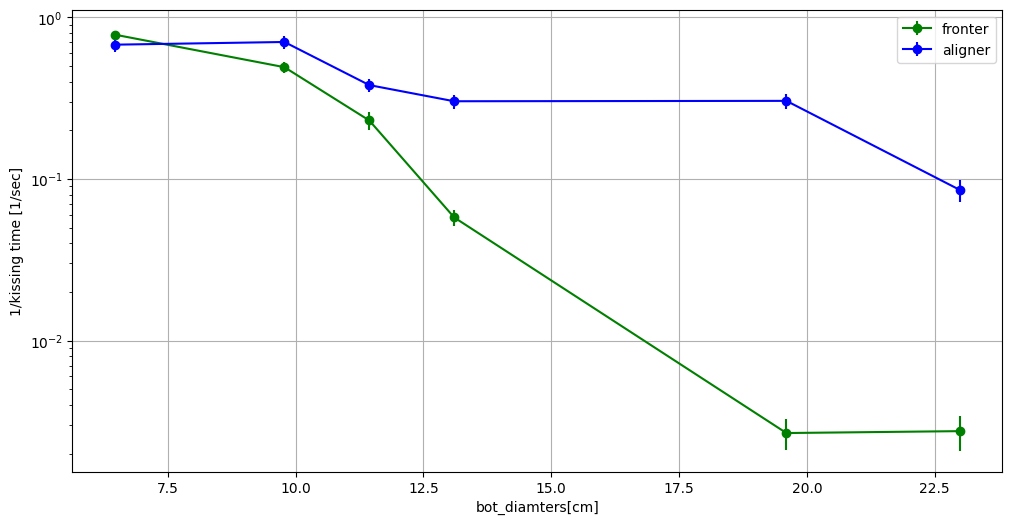

In [127]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
data_mean=data_table.groupby(['bottype','robots_skirts[cm]']).mean()
print(data_mean.loc['fronter'])
data_std=data_table.groupby(['bottype','robots_skirts[cm]']).std()
data_count=data_table.groupby(['bottype','robots_skirts[cm]']).count()
test_front=data_std.loc['fronter']['kissing_time']/np.sqrt(data_count.loc['fronter']['kissing_time'])
#print(test)
test_align=data_std.loc['aligner']['kissing_time']/np.sqrt(data_count.loc['aligner']['kissing_time'])
ax.errorbar(data_mean.loc['fronter'].index,1/data_mean.loc['fronter']['kissing_time'],yerr=test_front/(data_mean.loc['fronter']['kissing_time']**2)
            ,linestyle='-',marker='o',color='g',label='fronter')
ax.errorbar(data_mean.loc['aligner'].index,1/data_mean.loc['aligner']['kissing_time'],yerr=test_align/(data_mean.loc['aligner']['kissing_time']**2)
            ,linestyle='-',marker='o',color='b',label='aligner')
ax.set_xlabel('bot_diamters[cm]')
ax.set_ylabel('1/kissing time [1/sec]')
ax.set_yscale('log')
ax.grid()
ax.legend()

                     frames_No  kissing_time
robots_skirts[cm]                           
6.46                 32.000000      1.280000
9.78                 50.888889      2.035556
11.44               108.714286      4.348571
13.10               432.363636     17.294545
19.60              9333.705882    373.348235
23.00              9084.133333    363.365333


C:\Users\User\AppData\Local\Temp\ipykernel_81012\3034371593.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_mean=data_table.groupby(['bottype','robots_skirts[cm]']).mean()
C:\Users\User\AppData\Local\Temp\ipykernel_81012\3034371593.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_std=data_table.groupby(['bottype','robots_skirts[cm]']).std()


NameError: name 'test' is not defined

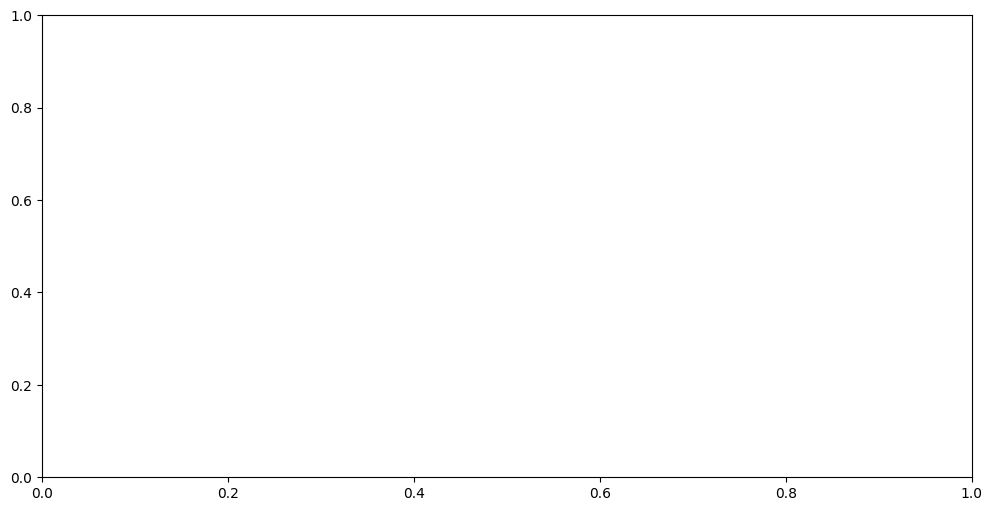

In [128]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
data_mean=data_table.groupby(['bottype','robots_skirts[cm]']).mean()
print(data_mean.loc['fronter'])
data_std=data_table.groupby(['bottype','robots_skirts[cm]']).std()
data_count=data_table.groupby(['bottype','robots_skirts[cm]']).count()
test_front=data_std.loc['fronter']['kissing_time']/np.sqrt(data_count.loc['fronter']['kissing_time'])
print(test)
test_align=data_std.loc['aligner']['kissing_time']/np.sqrt(data_count.loc['aligner']['kissing_time'])
ax.errorbar(data_mean.loc['fronter'].index,1/data_mean.loc['fronter']['kissing_time'],yerr=test_front/(data_mean.loc['fronter']['kissing_time']**2)
            ,linestyle='-',marker='o',color='g',label='fronter')
ax.errorbar(data_mean.loc['aligner'].index,1/data_mean.loc['aligner']['kissing_time'],yerr=test_align/(data_mean.loc['aligner']['kissing_time']**2)
            ,linestyle='-',marker='o',color='b',label='aligner')
ax.set_xlabel('bot_diamters[cm]')
ax.set_ylabel('1/kissing time [1/sec]')
#ax.set_yscale('log')
ax.grid()
ax.legend()

In [129]:
data_mean=data_table.groupby('robots_skirts[cm]').max()
print(data_mean)

                                                            filename  \
robots_skirts[cm]                                                      
6.46               D:\Eden\dress_exp\7_5_24\C0773.MP4_locatedFull...   
9.78               D:\Eden\dress_exp\7_5_24\C0772.MP4_locatedFull...   
11.44              D:\Eden\dress_exp\7_5_24\C0770.MP4_locatedFull...   
13.10              D:\Eden\dress_exp\7_5_24\C0771.MP4_locatedFull...   
19.60              D:\Eden\dress_exp\30_5_24\C0840.MP4_locatedFul...   
23.00              D:\Eden\dress_exp\30_5_24\C0847.MP4_locatedFul...   

                   frames_No  kissing_time  bottype  
robots_skirts[cm]                                    
6.46                    63.0          2.52  fronter  
9.78                   104.0          4.16  fronter  
11.44                  221.0          8.84  fronter  
13.10                  817.0         32.68  fronter  
19.60                22337.0        893.48  fronter  
23.00                23169.0        926.76  f

                     frames_No  kissing_time
robots_skirts[cm]                           
6.46                 32.000000      1.280000
9.78                 50.888889      2.035556
11.44               108.714286      4.348571
13.10               432.363636     17.294545
19.60              9333.705882    373.348235
23.00              9084.133333    363.365333


C:\Users\User\AppData\Local\Temp\ipykernel_81012\1332847690.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_mean=data_table.groupby(['bottype','robots_skirts[cm]']).mean()
C:\Users\User\AppData\Local\Temp\ipykernel_81012\1332847690.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_std=data_table.groupby(['bottype','robots_skirts[cm]']).std()


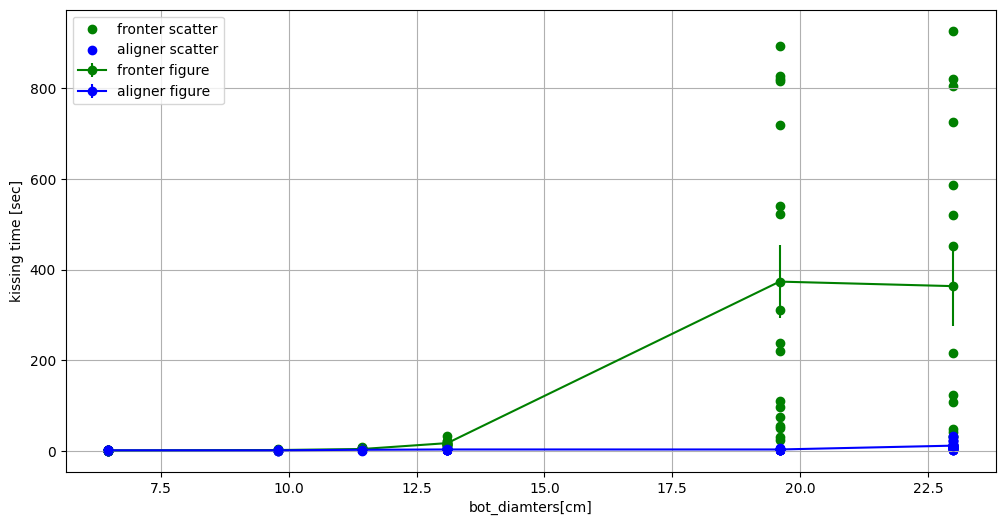

In [130]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
data_mean=data_table.groupby(['bottype','robots_skirts[cm]']).mean()
print(data_mean.loc['fronter'])
data_std=data_table.groupby(['bottype','robots_skirts[cm]']).std()
data_count=data_table.groupby(['bottype','robots_skirts[cm]']).count()
test_front=data_std.loc['fronter']['kissing_time']/np.sqrt(data_count.loc['fronter']['kissing_time'])
test_align=data_std.loc['aligner']['kissing_time']/np.sqrt(data_count.loc['aligner']['kissing_time'])
ax.errorbar(data_mean.loc['fronter'].index,data_mean.loc['fronter']['kissing_time'],yerr=test_front
            ,linestyle='-',marker='o',color='g',label='fronter figure')
ax.errorbar(data_mean.loc['aligner'].index,data_mean.loc['aligner']['kissing_time'],yerr=test_align
            ,linestyle='-',marker='o',color='b',label='aligner figure')
ax.set_xlabel('bot_diamters[cm]')
ax.set_ylabel('kissing time [sec]')
fronter=data_table[(data_table['bottype']=='fronter')]
aligner=data_table[(data_table['bottype']=='aligner')]
ax.scatter(fronter['robots_skirts[cm]'],fronter['kissing_time'],marker='o',color='g',label='fronter scatter')
ax.scatter(aligner['robots_skirts[cm]'],aligner['kissing_time'],marker='o',color='b',label='aligner scatter')
ax.grid()
ax.legend(loc='upper left')
#ax.set_yscale('log')
#ax.axis([0,24,-10,1000])

                     frames_No  kissing_time
robots_skirts[cm]                           
6.46                 32.000000      1.280000
9.78                 50.888889      2.035556
11.44               108.714286      4.348571
13.10               432.363636     17.294545
19.60              9333.705882    373.348235
23.00              9084.133333    363.365333


C:\Users\User\AppData\Local\Temp\ipykernel_81012\3485585224.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_mean=data_table.groupby(['bottype','robots_skirts[cm]']).mean()
C:\Users\User\AppData\Local\Temp\ipykernel_81012\3485585224.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_std=data_table.groupby(['bottype','robots_skirts[cm]']).std()


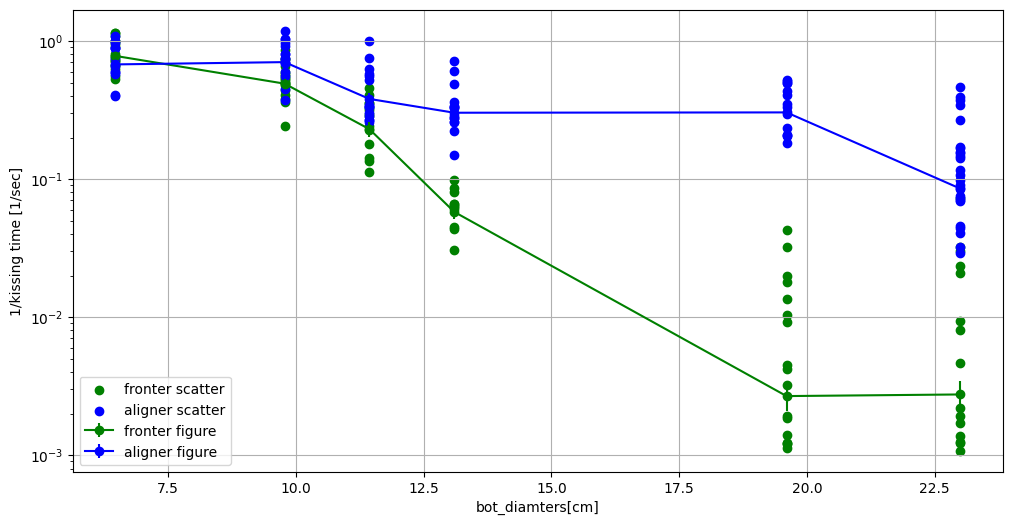

In [131]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
data_mean=data_table.groupby(['bottype','robots_skirts[cm]']).mean()
print(data_mean.loc['fronter'])
data_std=data_table.groupby(['bottype','robots_skirts[cm]']).std()
data_count=data_table.groupby(['bottype','robots_skirts[cm]']).count()
test_front=data_std.loc['fronter']['kissing_time']/np.sqrt(data_count.loc['fronter']['kissing_time'])
#print(test)
test_align=data_std.loc['aligner']['kissing_time']/np.sqrt(data_count.loc['aligner']['kissing_time'])
ax.errorbar(data_mean.loc['fronter'].index,1/data_mean.loc['fronter']['kissing_time'],yerr=test_front/(data_mean.loc['fronter']['kissing_time']**2)
            ,linestyle='-',marker='o',color='g',label='fronter figure')
ax.errorbar(data_mean.loc['aligner'].index,1/data_mean.loc['aligner']['kissing_time'],yerr=test_align/(data_mean.loc['aligner']['kissing_time']**2)
            ,linestyle='-',marker='o',color='b',label='aligner figure')
fronter=data_table[(data_table['bottype']=='fronter')]
aligner=data_table[(data_table['bottype']=='aligner')]
ax.scatter(fronter['robots_skirts[cm]'],1/fronter['kissing_time'],marker='o',color='g',label='fronter scatter')
ax.scatter(aligner['robots_skirts[cm]'],1/aligner['kissing_time'],marker='o',color='b',label='aligner scatter')
ax.set_xlabel('bot_diamters[cm]')
ax.set_ylabel('1/kissing time [1/sec]')
ax.set_yscale('log')
ax.grid()
ax.legend(loc='lower left')
#ax.yaxis([10,0.001])

In [132]:
aligner.groupby('robots_skirts[cm]').min()

,filename,frames_No,kissing_time,bottype
robots_skirts[cm],,,,
6.46,D:\Eden\dress_exp\15_5_24\aligners\C0805.MP4_l...,23.0,0.92,aligner
9.78,D:\Eden\dress_exp\15_5_24\aligners\C0806.MP4_l...,21.0,0.84,aligner
11.44,D:\Eden\dress_exp\15_5_24\aligners\C0807.MP4_l...,25.0,1.00,aligner
13.10,D:\Eden\dress_exp\15_5_24\aligners\C0808.MP4_l...,35.0,1.40,aligner
19.60,D:\Eden\dress_exp\15_5_24\aligners\C0809.MP4_l...,48.0,1.92,aligner
23.00,D:\Eden\dress_exp\16_5_24_aligners\C0810.MP4_l...,54.0,2.16,aligner


In [141]:
data_table.index[data_table['kissing_time']==1]

Int64Index([43, 57, 68, 92], dtype='int64')

In [139]:
data_table.iloc[59]

filename             D:\Eden\dress_exp\7_5_24\C0773.MP4_locatedFull...
robots_skirts[cm]                                                 6.46
frames_No                                                         35.0
kissing_time                                                       1.4
bottype                                                        fronter
Name: 59, dtype: object

In [140]:
print(indexes[61])

74


                     frames_No  kissing_time
robots_skirts[cm]                           
6.46                 32.000000      1.280000
9.78                 50.888889      2.035556
11.44               108.714286      4.348571
13.10               432.363636     17.294545
19.60              9333.705882    373.348235
23.00              9084.133333    363.365333


C:\Users\User\AppData\Local\Temp\ipykernel_81012\4102169502.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_mean=data_table.groupby(['bottype','robots_skirts[cm]']).mean()
C:\Users\User\AppData\Local\Temp\ipykernel_81012\4102169502.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_std=data_table.groupby(['bottype','robots_skirts[cm]']).std()


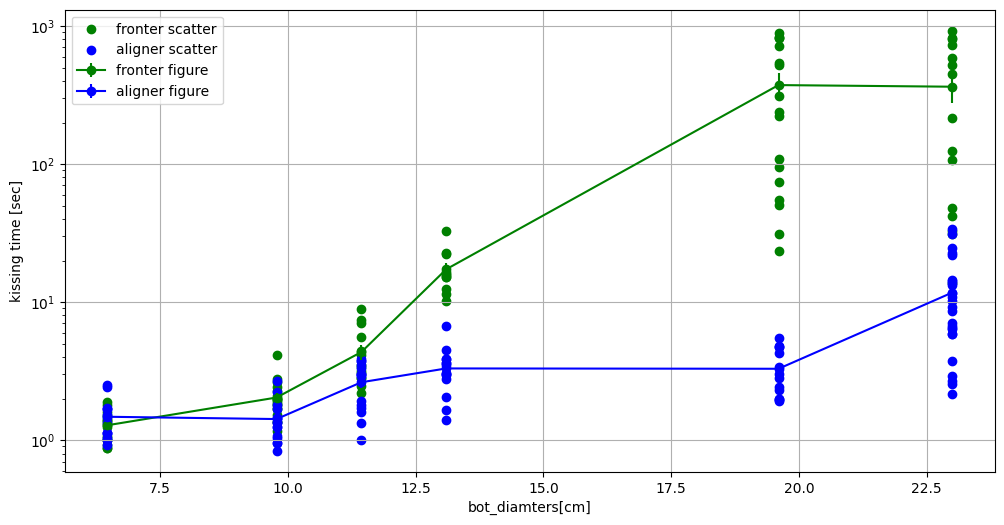

In [137]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
data_mean=data_table.groupby(['bottype','robots_skirts[cm]']).mean()
print(data_mean.loc['fronter'])
data_std=data_table.groupby(['bottype','robots_skirts[cm]']).std()
data_count=data_table.groupby(['bottype','robots_skirts[cm]']).count()
test_front=data_std.loc['fronter']['kissing_time']/np.sqrt(data_count.loc['fronter']['kissing_time'])
test_align=data_std.loc['aligner']['kissing_time']/np.sqrt(data_count.loc['aligner']['kissing_time'])
ax.errorbar(data_mean.loc['fronter'].index,data_mean.loc['fronter']['kissing_time'],yerr=test_front
            ,linestyle='-',marker='o',color='g',label='fronter figure')
ax.errorbar(data_mean.loc['aligner'].index,data_mean.loc['aligner']['kissing_time'],yerr=test_align
            ,linestyle='-',marker='o',color='b',label='aligner figure')
ax.set_xlabel('bot_diamters[cm]')
ax.set_ylabel('kissing time [sec]')
fronter=data_table[(data_table['bottype']=='fronter')]
aligner=data_table[(data_table['bottype']=='aligner')]
ax.scatter(fronter['robots_skirts[cm]'],fronter['kissing_time'],marker='o',color='g',label='fronter scatter')
ax.scatter(aligner['robots_skirts[cm]'],aligner['kissing_time'],marker='o',color='b',label='aligner scatter')
ax.grid()
ax.set_yscale('log')
ax.legend(loc='upper left')